In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize']=(12,12)

In [2]:
tokenRDD = sc.textFile('/home/alex/Projects/TRA/tokens.txt', 3 * sc.defaultParallelism)

sc.addPyFile('/home/alex/Projects/TRA/loadocpnpz.py')

In [3]:
tokenRDD.filter(lambda line: 'S05' in line ).collect()

[u'Aratome15a_S05_W01',
 u'Aratome15a_S05_W02',
 u'Aratome15a_S05_W03',
 u'Aratome15a_S05_W04',
 u'Aratome15a_S05_W05',
 u'Aratome15a_S05_W06',
 u'Aratome15a_S05_W07',
 u'Aratome15a_S05_W08',
 u'Aratome15a_S05_W09',
 u'Aratome15a_S05_W10',
 u'Aratome15a_S05_W11',
 u'Aratome15a_S05_W12']

In [16]:
def SquashYCube(cube):
    med_val = np.median(cube)
    std_val = np.std(cube)
    threshold = med_val + 1.5*std_val
    squashed = np.sum(np.sum(cube>threshold,axis=0),axis=0)
    #squashed=np.sum(np.sum(cube,axis=0),axis=0)
    return squashed

In [24]:


import sys
sys.path.append('/home/alex/Projects/TRA')
from loadocpnpz import loadOCPnpz

data_cubes = tokenRDD.filter(lambda line: 'S05' in line ).map( lambda line: ( line, loadOCPnpz(line) ) ).cache()
#selectedTokens = tokenRDD.filter(lambda line: 'S05' in line).collect())
#data_cubes = selectedTokens.map( lambda line: loadOCPnpz(line) )



In [25]:
data_squashed = data_cubes.map(lambda cube: (cube[0], SquashYCube( cube[1] )) ).cache()

In [ ]:
print tokenRDD.getNumPartitions()

In [ ]:

cube = data_cubes.first()
squash = data_squashed.first()

In [ ]:
print 'cube_shape',cube.shape
print 'squash shape',squash.shape

In [26]:
data_squashed.take(2)

[(u'Aratome15a_S05_W01', array([403, 403, 405, ...,   0,   0,   0])),
 (u'Aratome15a_S05_W02', array([424, 424, 424, ...,   0,   0,   0]))]

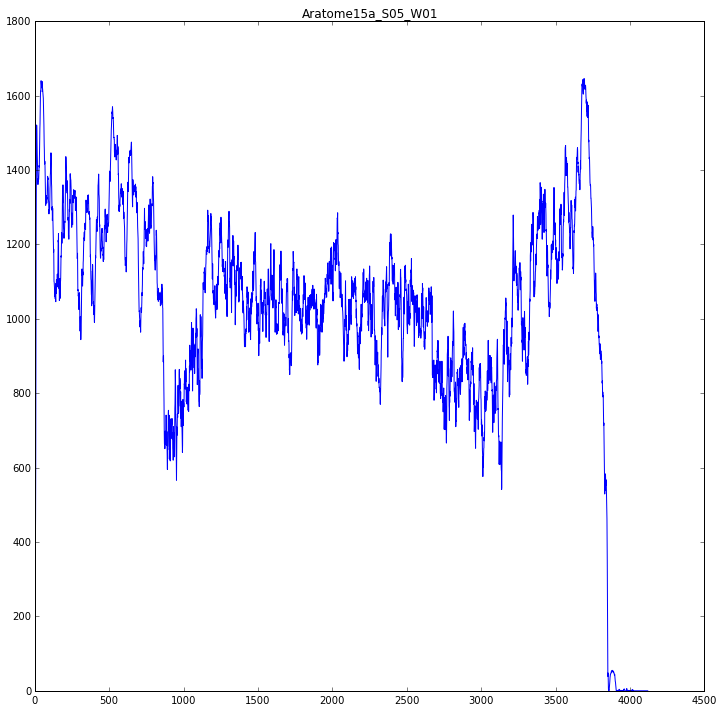

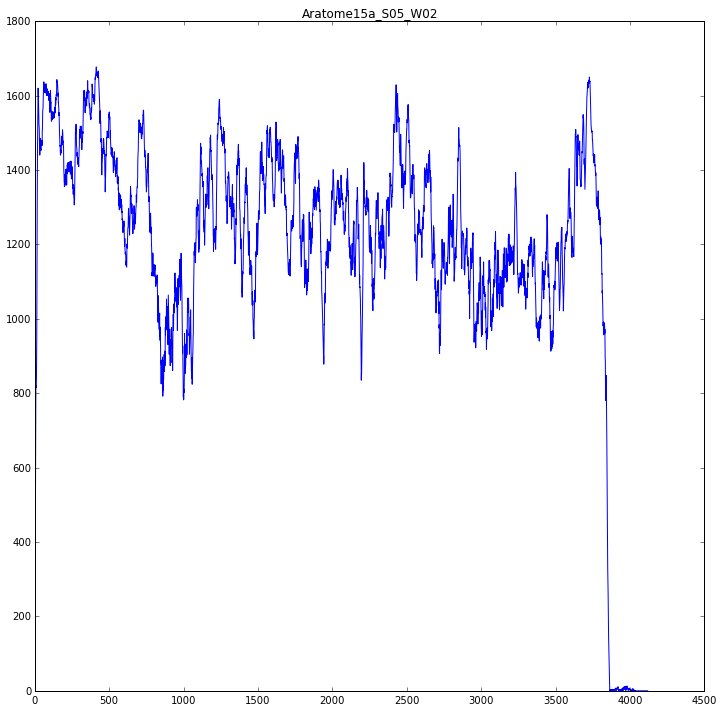

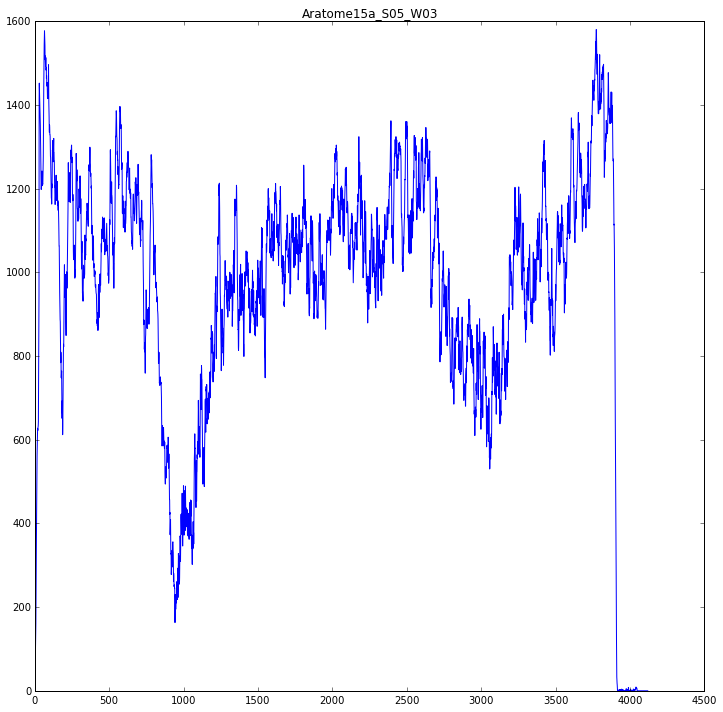

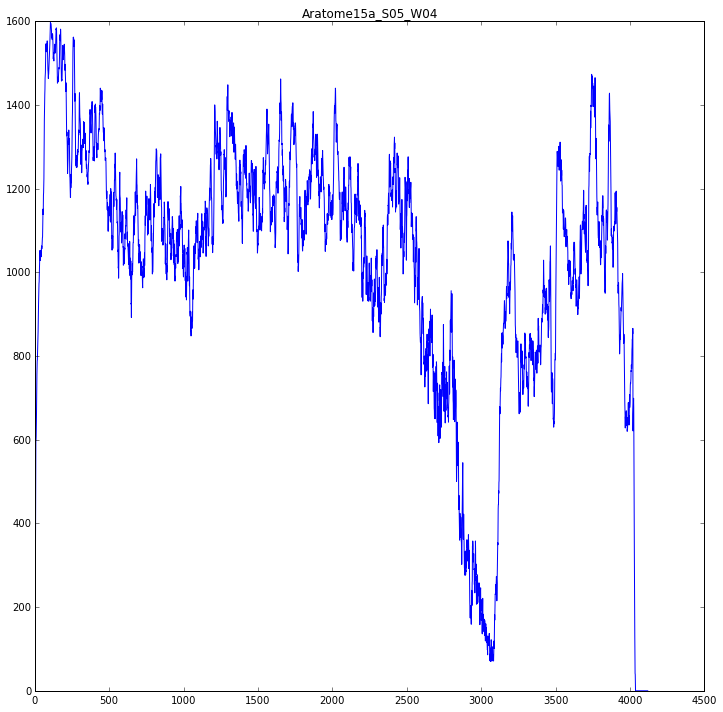

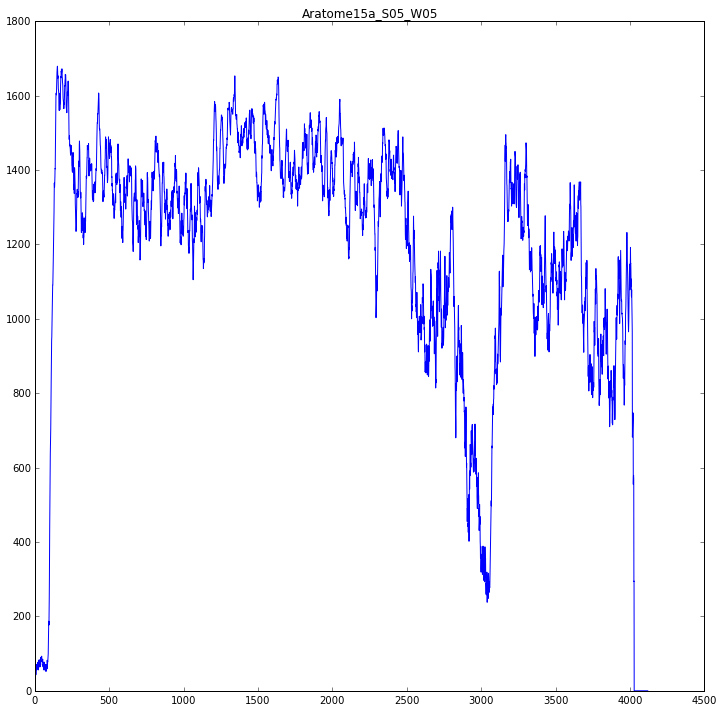

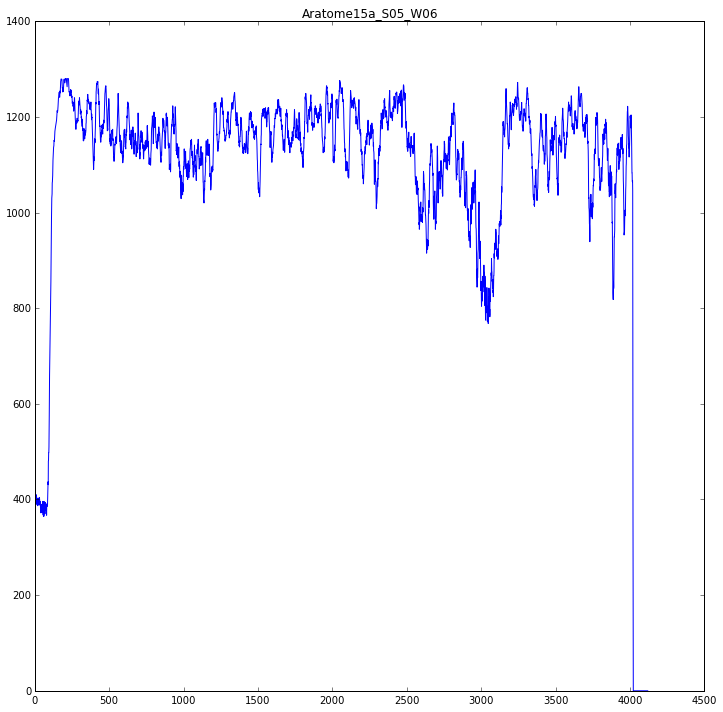

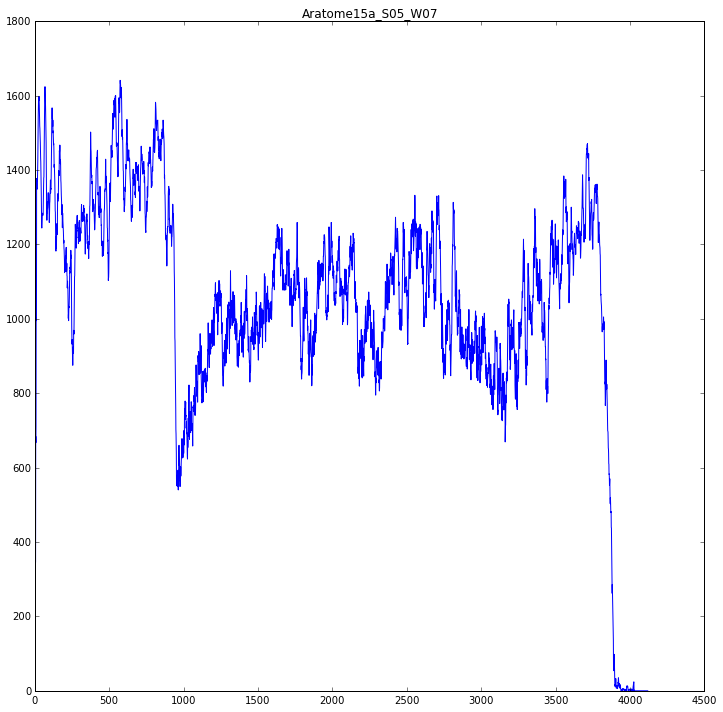

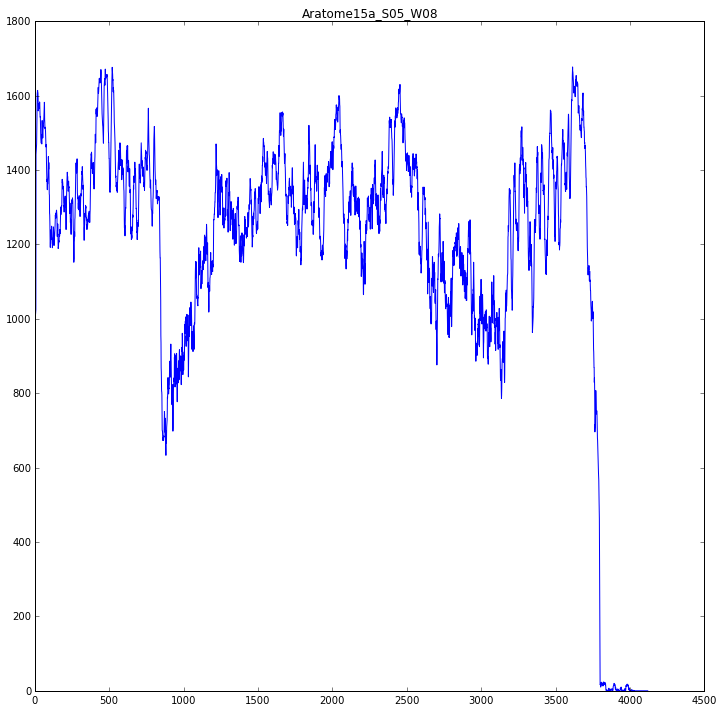

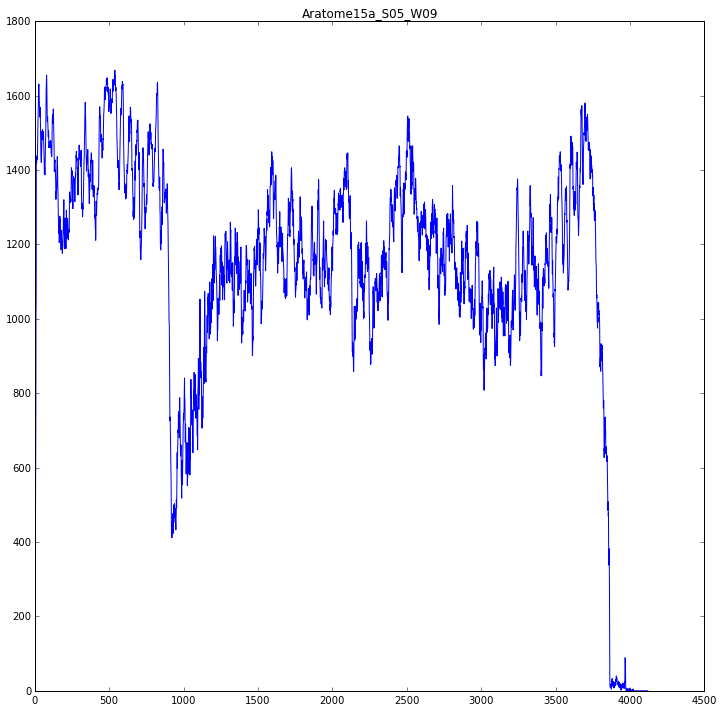

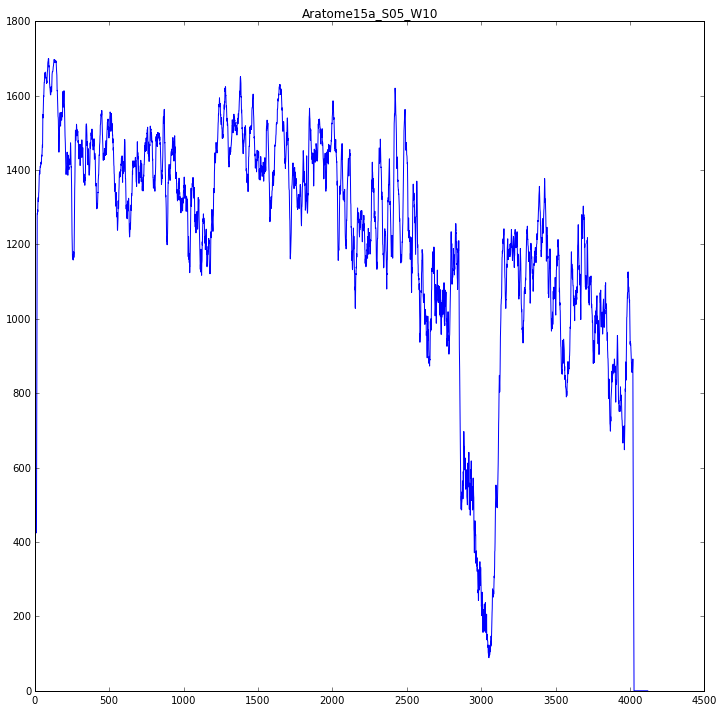

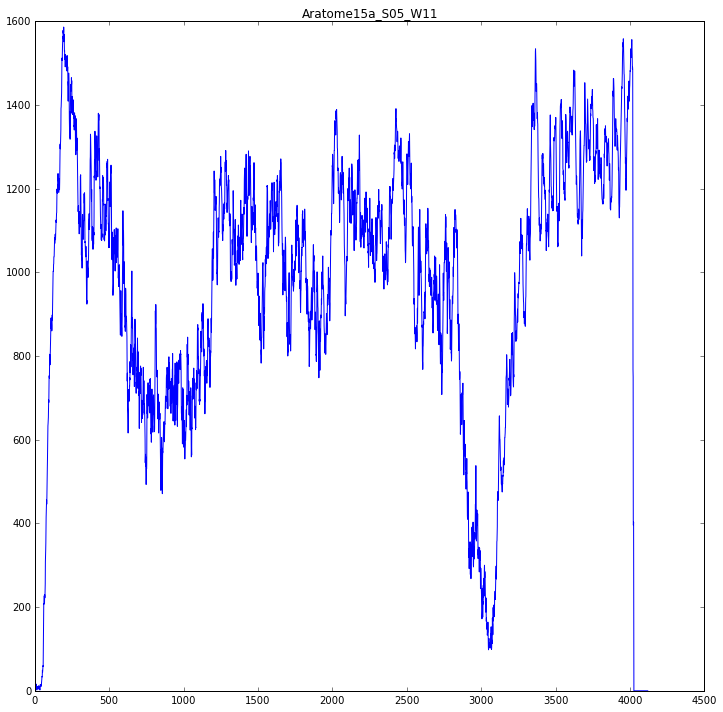

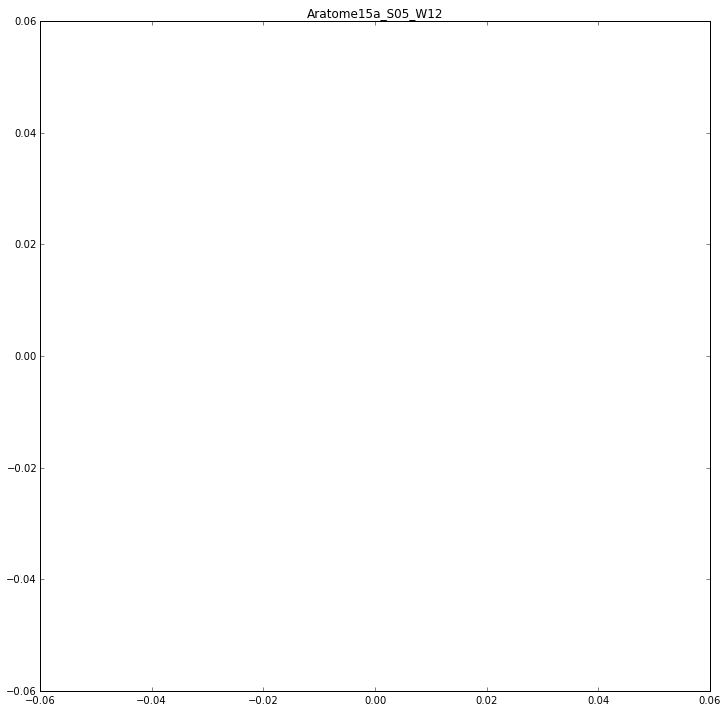

In [27]:

for line,cube in data_squashed.collect():
    f,ax = plt.subplots()
    ax.plot(cube)
    ax.set_title(line)

## 